## Machine Learning-Based Research on Prediction of Hot Topics in Online Media

- **Project Background**: In today's era of information explosion, online media has become the main channel for information dissemination. The content generated and spread influences the formation of public opinions, the direction of social discourse, and market trends. Hot topics in online media, especially those that can attract widespread attention and discussion, often reflect current societal focus and shifts in public interest. Traditional content analysis and prediction methods based on manual efforts are no longer sufficient to meet the needs of quickly and accurately predicting online hot topics. This challenge has prompted researchers to seek new technological solutions, and the development of machine learning technology offers a potential solution.

- **Project Tasks**: This project will analyze text data in online media, such as news headlines, content features, and news length, to learn the characteristics and propagation patterns of topics, thus predicting which current or emerging topics might gain widespread public attention. The process will involve using Python for data cleaning, feature processing, model building, and model evaluation to achieve the goal of predicting hot topics.
- **Project Steps**:
  1. Data exploration and problem analysis;
  2. Data cleaning;
     - a. Removing irrelevant features;
     - b. Handling missing values;
     - c. Label transformation (for easier classification);
     - d. Checking for duplicates;
  3. Feature engineering;
     - a. Feature generation;
     - b. Feature selection;
  4. Model selection with cross-validation and grid search;
  5. Model ensemble;
  6. In-depth thinking on model evaluation;
  7. In-depth thinking on model interpretation;
  8. Further considerations on the project.                

>**Note**: If there are any libraries that are not installed, please use `pip install`, `conda install` commands to install them

---
## Preliminary Thoughts on the Project

### This project aims to analyze article content on news platforms and predict the popularity of media content.

**Question 1:** Is there a fundamental difference between particularly viral news and ordinary news? Ifthere is a fundamental difference, should we analyze the top 1% of viral news as positive examples and the rest as negative examples? If not, what would our analytical approach be?

**Answer:** There is a fundamental difference between particularly viral news and ordinary news. Viral news often contains elements that provoke strong emotions, are highly relevant to current events, or have a significant impact on society, which ordinary news might lack. Analyzing the top 1% of viral news as positive examples can help us understand these unique characteristics and model them effectively.

**Question 2:** Here, we use features built according to the IDSS system, focusing on manually specified shallow features and features deeply mined using the LDA method. Please understand the application of the LDA topic model in natural language processing.

**Answer:** The LDA (Latent Dirichlet Allocation) topic model is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. In the context of NLP, LDA can be used to identify topics prevalent in a corpus of text, which helps in extracting structured topic information from unstructured text data.

**Question 3:** Should the trade-off between the amount of information in features and the complexity of computation be managed?

**Answer:** The trade-off can be managed by selecting a subset of highly informative features while also considering feature engineering techniques that simplify data representation without losing essential information. Techniques like dimensionality reduction or selecting key features based on their information gain regarding the output variable can be beneficial.

**Question 4:** Considering discretizing continuous features, or other methods, to further engineer features to improve prediction accuracy.

**Answer:** Discretizing continuous features can help in handling non-linear relationships more effectively and can simplify the model. Other methods like feature transformation (e.g., log transformation), interaction terms between features, or using polynomial features can also help in capturing more complexity and improve the model's performance.


---
## Step 1：Data Exploration and Issue Analyse


the data file：
- OnlineNewsPopularity.csv

## Article Features Explanation

1. **timedelta**: The number of days between the publication of the article and the last article in the dataset.
2. **n_tokens_title**: The number of words in the title.
3. **n_tokens_content**: The number of words in the content.
4. **n_unique_tokens**: The ratio of unique words in the content.
5. **n_non_stop_words**: The ratio of non-stop words in the content.
6. **n_non_stop_unique_tokens**: The ratio of unique non-stop words in the content.
7. **num_hrefs**: The number of hyperlinks in the article.
8. **num_self_hrefs**: The number of hyperlinks within the article pointing to itself.
9. **num_imgs**: The number of images in the article.
10. **num_videos**: The number of videos in the article.
11. **average_token_length**: The average length of words in the content.
12. **num_keywords**: The number of keywords used in the article.
13. **data_channel_is_lifestyle**: Whether the article is about lifestyle.
14. **data_channel_is_entertainment**: Whether the article is about entertainment.
15. **data_channel_is_bus**: Whether the article is about business.
16. **data_channel_is_socmed**: Whether the article is about social media.
17. **data_channel_is_tech**: Whether the article is about technology.
18. **data_channel_is_world**: Whether the article is about world news.
19. **kw_min_min**: The minimum of the lowest search volume of all keywords.
20. **kw_max_min**: The maximum of the lowest search volume of all keywords.
21. **kw_avg_min**: The average of the lowest search volume of all keywords.
22. **kw_min_max**: The minimum of the highest search volume of all keywords.
23. **kw_max_max**: The maximum of the highest search volume of all keywords.
24. **kw_avg_max**: The average of the highest search volume of all keywords.
25. **kw_min_avg**: The minimum of the average search volume of all keywords.
26. **kw_max_avg**: The maximum of the average search volume of all keywords.
27. **kw_avg_avg**: The average of the average search volume of all keywords.
28. **self_reference_min_shares**: The minimum number of shares of the articles that reference themselves.
29. **self_reference_max_shares**: The maximum number of shares of the articles that reference themselves.
30. **self_reference_avg_shares**: The average number of shares of the articles that reference themselves.
31. **weekday_is_monday**: Whether the article is published on a Monday.
32. **weekday_is_tuesday**: Whether the article is published on a Tuesday.
33. **weekday_is_wednesday**: Whether the article is published on a Wednesday.
34. **weekday_is_thursday**: Whether the article is published on a Thursday.
35. **weekday_is_friday**: Whether the article is published on a Friday.
36. **weekday_is_saturday**: Whether the article is published on a Saturday.
37. **weekday_is_sunday**: Whether the article is published on a Sunday.
38. **is_weekend**: Whether the article is published on the weekend.
39. **LDA_00** - **LDA_04**: The distribution of five topics derived using the LDA model.
40. **global_subjectivity**: The subjectivity score of the article.
41. **global_sentiment_polarity**: The sentiment polarity score of the article.
42. **global_rate_positive_words**: The ratio of positive words in the article.
43. **global_rate_negative_words**: The ratio of negative words in the article.
44. **rate_positive_words**: The ratio of positive words among non-stop words.
45. **rate_negative_words**: The ratio of negative words among non-stop words.
46. **avg_positive_polarity**: The average polarity of positive sentiments.
47. **min_positive_polarity**: The minimum polarity of positive sentiments.
48. **max_positive_polarity**: The maximum polarity of positive sentiments.
49. **avg_negative_polarity**: The average polarity of negative sentiments.
50. **min_negative_polarity**: The minimum polarity of negative sentiments.
51. **max_negative_polarity**: The maximum polarity of negative sentiments.
52. **title_subjectivity**: The subjectivity of the title.
53. **title_sentiment_polarity**: The sentiment polarity of the title.
54. **abs_title_subjectivity**: The absolute subjectivity of the title (the difference from average subjectivity).


In [1]:
# import library
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#load data
data = pd.read_csv('OnlineNewsPopularity.csv')
col_name= data.columns[:-2]
label_name = data.columns[-1]
#check the labels
print('labels：{}\n'.format(label_name))
#check the features
print('features：{}\n'.format(col_name))
#check the shape of data
print('shape：{}'.format(data.shape))

labels：shares

features：Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_posit

---
print the front 5 rows


In [2]:
data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,349,10,400,0.546599,1.0,0.706140,7,3,0,0,...,0.033333,0.8,-0.285000,-0.500000,-0.125000,0.375000,0.400000,0.125000,0.400000,1600
1,356,8,337,0.589820,1.0,0.748691,4,2,1,1,...,0.100000,0.5,-0.178571,-0.178571,-0.178571,0.500000,0.500000,0.000000,0.500000,905
2,657,12,2004,0.371847,1.0,0.575269,18,3,1,1,...,0.033333,1.0,-0.220667,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,6600
3,300,9,120,0.775000,1.0,0.878378,3,1,0,2,...,0.033333,0.5,-0.385417,-0.600000,-0.125000,0.666667,-0.333333,0.166667,0.333333,987
4,295,13,1686,0.441733,1.0,0.609360,60,4,24,5,...,0.050000,0.8,-0.313054,-1.000000,-0.100000,0.400000,-0.400000,0.100000,0.400000,9800


check the distribution of label 'shares'

In [3]:
# discribe the distribution of labels
data['shares'].dtypes
data['shares']=data['shares'].astype(str).astype(float)
data['shares'].describe()

count     38541.000000
mean       3405.600867
std       11740.763679
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

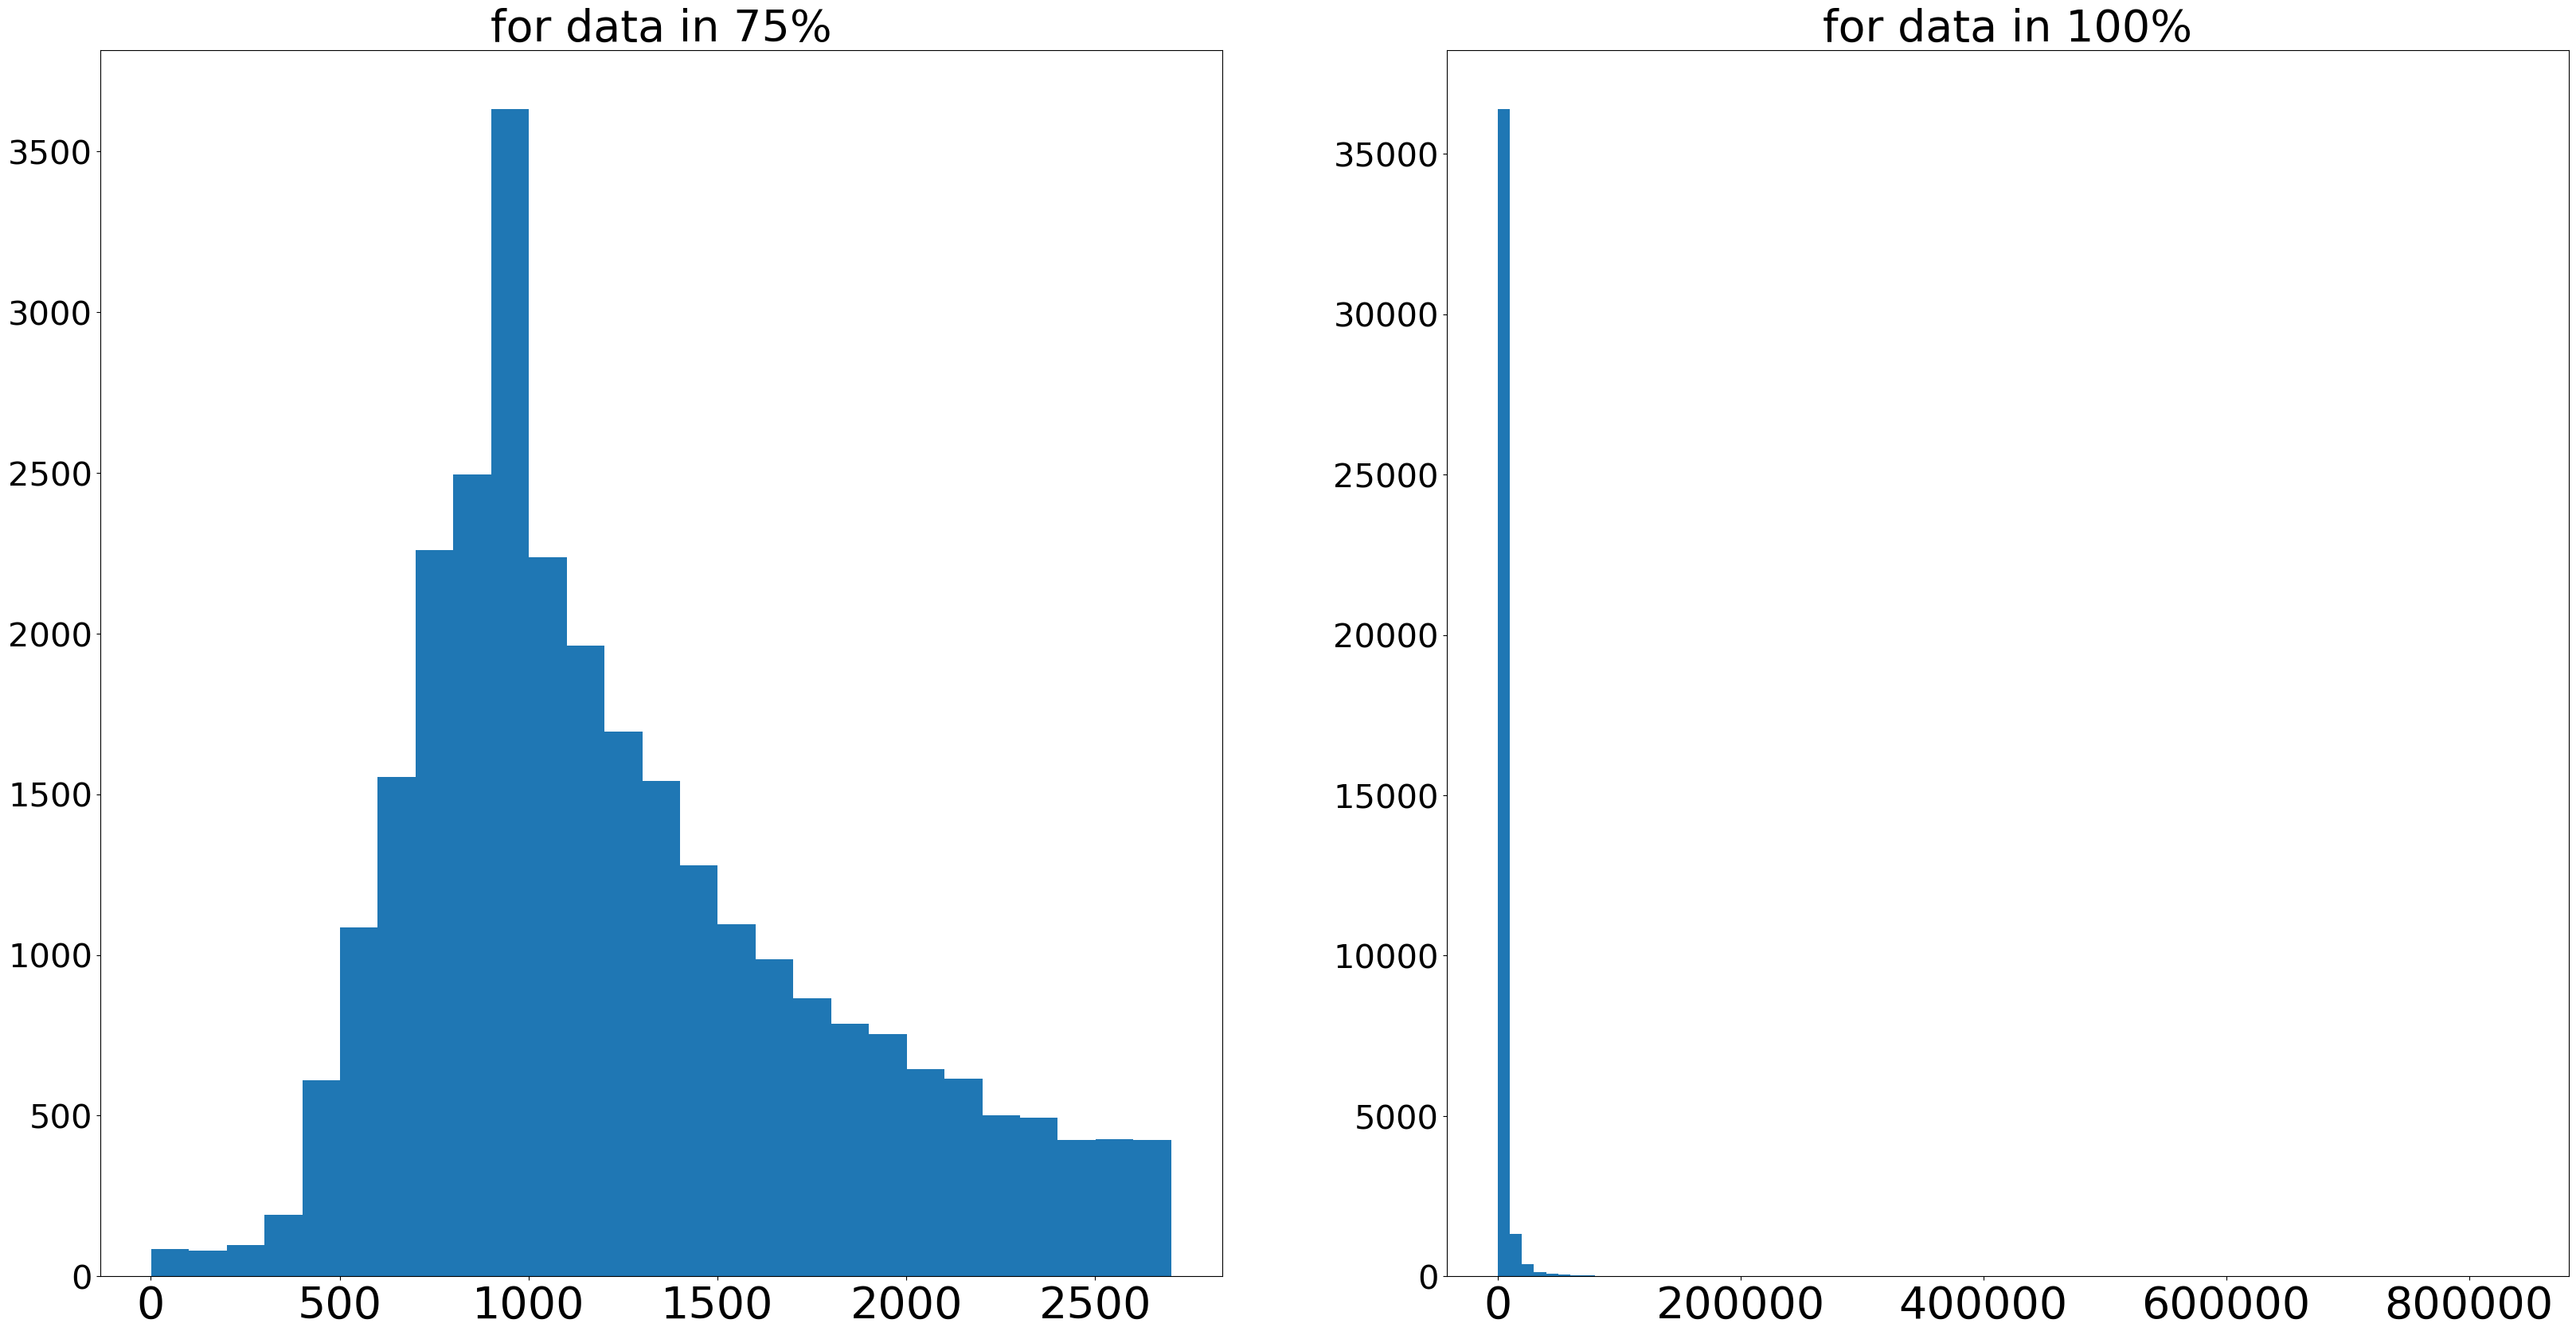

In [4]:
# draw the hist graph of labels
plt.figure(figsize=(40, 20))

# First histogram
plt.subplot(1, 2, 1)
plt.title('for data in 75%', fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=30)
bin_num1 = list(range(1, 2800, 100))
plt.hist(data['shares'], bins=bin_num1)

# Second histogram
plt.subplot(1, 2, 2)
plt.title('for data in 100%', fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=30)
bin_num2 = list(range(1, 843300, 10000))
plt.hist(data['shares'], bins=bin_num2)

plt.show()

---
check the distribution of dataset's features, the transpose of data can show more features.(but is costs more time)<br>

In [5]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38541.000000,38541.000000,38541.000000,38541.000000,38541.000000,38541.000000,38541.000000,38541.000000,38541.000000,38541.000000,...,38541.000000,38541.000000,38541.000000,38541.000000,38541.000000,38541.000000,38541.000000,38541.000000,38541.000000,38541.000000
mean,354.456760,10.400016,546.593783,0.548668,0.997146,0.689545,10.892297,3.293558,4.549986,1.247814,...,0.095386,0.756828,-0.259348,-0.521563,-0.107443,0.282617,0.071214,0.341877,0.156075,3405.600867
std,214.184175,2.114018,471.230823,3.570658,5.305488,3.311105,11.348677,3.863702,8.298894,4.108411,...,0.071223,0.247939,0.127621,0.290262,0.095201,0.324499,0.265346,0.188858,0.226097,11740.763679
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470860,1.000000,0.625641,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328333,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539216,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253241,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608527,1.000000,0.754545,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186806,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
# data.T.describe()

---
## Step 2: Data Cleaning

In this step, we will begin cleaning the data.

Observations from the data reveal:

- We need to check for missing values;
- We need to check for duplicate samples;
- If it is necessary to convert labels into a binary variable, then the labels need to be changed;
- Some features vary greatly in scale among different samples, and there is a large disparity in scale between features, necessitating data transformation.



In [7]:
#drop unrelated variable 'timedelta'
data=data.drop('timedelta',axis=1)

---
## Counting Missing Values

We need to perform the following operations to understand the extent of missing data:

- Count the number of missing values in the dataset.
- Count how many rows in the dataset have at least one missing value.
- Count how many columns in the dataset have at least one missing value.


In [8]:
print('共有',len([i for i in data.isnull().sum() if i>0]),'列存在缺失')
print('共有',len([i for i in data.isnull().sum(axis=1) if i>0]),'行存在缺失')

共有 0 列存在缺失
共有 0 行存在缺失


count duplicated number of dataset

In [9]:
len([i for i in data.duplicated() if i==True])

0

---
## Label Data Transformation

Using the median value of 1400 as a threshold, divide the `shares` into "0" and "1".


In [10]:
data['shares'] = data['shares'].apply(lambda x: 1 if x >= 1400 else 0)

In [11]:
#check if finished
data['shares'].head()

0    1
1    0
2    1
3    0
4    1
Name: shares, dtype: int64

In [12]:
len(data["shares"].loc[data["shares"]==0])

17986

In [13]:
len(data["shares"].loc[data["shares"]==1])

20555

---
## Feature Transformation Due to Large Range Differences

- Some features have a large range, necessitating data transformation.
- There is a significant disparity in scale between features, so appropriate processing should be done before modeling according to model requirements.

#### Transforming Skewed Continuous Features

A dataset may sometimes contain features that are near a certain number but sometimes also feature relatively non-trivial distributions with extreme values. Algorithms can be highly sensitive to such distributions, and poor normalization can degrade algorithm performance. We find that the minimum values of all features are almost -1 or 0, so if using logarithmic transformation, it is necessary to add 2 to all feature values before transforming.


In [14]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,10,400,0.546599,1.0,0.706140,7,3,0,0,4.842500,...,0.033333,0.8,-0.285000,-0.500000,-0.125000,0.375000,0.400000,0.125000,0.400000,1
1,8,337,0.589820,1.0,0.748691,4,2,1,1,4.753709,...,0.100000,0.5,-0.178571,-0.178571,-0.178571,0.500000,0.500000,0.000000,0.500000,0
2,12,2004,0.371847,1.0,0.575269,18,3,1,1,4.542415,...,0.033333,1.0,-0.220667,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1
3,9,120,0.775000,1.0,0.878378,3,1,0,2,4.875000,...,0.033333,0.5,-0.385417,-0.600000,-0.125000,0.666667,-0.333333,0.166667,0.333333,0
4,13,1686,0.441733,1.0,0.609360,60,4,24,5,4.679122,...,0.050000,0.8,-0.313054,-1.000000,-0.100000,0.400000,-0.400000,0.100000,0.400000,1


In [15]:
# find the features which >5000 
# save the features in log_col list
log_col=[]
for col in data.columns:
    if np.max(data[col])>5000:
        log_col.append(col)
log_col

['n_tokens_content',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess']

In [16]:
# using logarithmic transformation(plus 2 first)
for i in log_col:
    data[i]=np.log(data[i]+2)
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,10,5.996452,0.546599,1.0,0.706140,7,3,0,0,4.842500,...,0.033333,0.8,-0.285000,-0.500000,-0.125000,0.375000,0.400000,0.125000,0.400000,1
1,8,5.826000,0.589820,1.0,0.748691,4,2,1,1,4.753709,...,0.100000,0.5,-0.178571,-0.178571,-0.178571,0.500000,0.500000,0.000000,0.500000,0
2,12,7.603898,0.371847,1.0,0.575269,18,3,1,1,4.542415,...,0.033333,1.0,-0.220667,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1
3,9,4.804021,0.775000,1.0,0.878378,3,1,0,2,4.875000,...,0.033333,0.5,-0.385417,-0.600000,-0.125000,0.666667,-0.333333,0.166667,0.333333,0
4,13,7.431300,0.441733,1.0,0.609360,60,4,24,5,4.679122,...,0.050000,0.8,-0.313054,-1.000000,-0.100000,0.400000,-0.400000,0.100000,0.400000,1


---
### Recoding Categorical Features

Since the categories of an unordered feature cannot be compared in size, such features (called nominal categorical variables) typically require transformation. A popular method for transforming unordered categorical variables is using **one-hot encoding**. One-hot encoding creates a "dummy" variable for each possible category of each unordered categorical feature. For example, suppose `someFeature` has three possible values: `A`, `B`, or `C`. We would encode this feature into `someFeature_A`, `someFeature_B`, and `someFeature_C`.

| someFeature | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: | :-: | :-: |
|  A  | 1 | 0 | 0 |
|  B  | 0 | 1 | 0 |
|  C  | 0 | 0 | 1 |

- Apply one-hot encoding to the `'features_raw'` data using [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies).<br>


- From the table in the **Data Exploration** section above, we can see that there are several features that are unordered categorical features.

---

### Features below have been found:
1. **data_channel_is_lifestyle**: Whether the article belongs to the lifestyle channel.
2. **data_channel_is_entertainment**: Whether the article belongs to the entertainment channel.
3. **data_channel_is_bus**: Whether the article belongs to the business channel.
4. **data_channel_is_socmed**: Whether the article belongs to the social media channel.
5. **data_channel_is_tech**: Whether the article belongs to the technology channel.
6. **data_channel_is_world**: Whether the article belongs to the world news channel.
   
1. **weekday_is_monday**: Whether the article is published on Monday.
2. **weekday_is_tuesday**: Whether the article is published on Tuesday.
3. **weekday_is_wednesday**: Whether the article is published on Wednesday.
4. **weekday_is_thursday**: Whether the article is published on Thursday.
5. **weekday_is_friday**: Whether the article is published on Friday.
6. **weekday_is_saturday**: Whether the article is published on Saturday.
7. **weekday_is_sunday**: Whether the article is published on Sunday.
8. **is_weekend**: Whether the article is published on the weekend.

Since the dataset already contains features in one-hot encoded form, there is no need for further encoding.


---
## Step 3: Feature Engineering

- Feature Generation
- Feature Filtering


From the **Preliminary Thoughts on the Project**, it is evident that we are utilizing a variety of methods for feature engineering. First, we generate new features to incorporate into the model for prediction; second, we apply methods to filter out features, reducing the number of features included in the model.

---
We will add data reduced by PCA to the original dataset and then use Random Forest for feature selection. This method combines the dimensionality reduction benefits of PCA with the feature selection capabilities of Random Forest, which may help improve model performance, especially when dealing with high-dimensional data.<br>

A simple prediction of the processed high-dimensional data using logistic regression is used to preliminarily assess the effectiveness of PCA.

---
### Separate Features and Labels

In [17]:
X = data[data.columns.difference(['shares'])]
y = data['shares']

---
### split trainset and testset
to avoid including testset information when doing feature engineering in testset

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [19]:
X_train.head()

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,abs_title_sentiment_polarity,abs_title_subjectivity,average_token_length,avg_negative_polarity,avg_positive_polarity,...,self_reference_min_shares,title_sentiment_polarity,title_subjectivity,weekday_is_friday,weekday_is_monday,weekday_is_saturday,weekday_is_sunday,weekday_is_thursday,weekday_is_tuesday,weekday_is_wednesday
36168,0.022278,0.022293,0.022233,0.577700,0.355496,0.000000,0.500000,4.052326,-0.377778,0.387710,...,7.938089,0.000000,0.000000,0,0,0,0,0,1,0
13914,0.028601,0.354088,0.028572,0.560157,0.028581,0.288889,0.011111,4.647059,-0.343056,0.375131,...,8.189245,0.288889,0.511111,0,0,0,0,1,0,0
7797,0.028574,0.028585,0.028606,0.885664,0.028572,0.000000,0.500000,4.826840,-0.172258,0.370065,...,8.132119,0.000000,0.000000,0,0,0,0,1,0,0
19142,0.528758,0.404057,0.022327,0.022320,0.022538,0.000000,0.500000,4.465262,-0.315484,0.352600,...,8.497399,0.000000,0.000000,0,1,0,0,0,0,0
9774,0.558740,0.033334,0.341259,0.033334,0.033334,0.000000,0.500000,4.906542,-0.244444,0.391000,...,6.890609,0.000000,0.000000,0,0,0,0,0,0,1


---
judge initial classification effect

In [20]:
'''  use logistic regression to judge the original result'''
#train the LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,make_scorer
import warnings
warnings.filterwarnings("ignore")

lr=LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.6104047742605085
0.6055260085614217


---
## Using PCA for Feature Generation

Apart from dimensionality reduction, PCA (Principal Component Analysis) can also be used for feature generation. This involves merging the selected principal components with the original data, which generally enhances the predictive ability of the original data.


In [21]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X,y)
ratio=pca.explained_variance_ratio_
cum_ratio=ratio.cumsum()

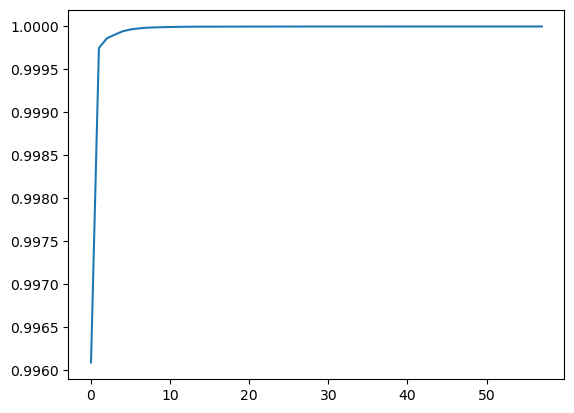

In [22]:
xlabel_pca=list(range(len(cum_ratio)))
plt.plot(xlabel_pca,cum_ratio)

In [23]:
# use PCA to generate new features in trainset
from sklearn.decomposition import PCA
pca1 = PCA(n_components='mle')
pc_data=pca1.fit_transform(X_train)
pc = pd.DataFrame(pca1.fit_transform(X_train))
pc.index =  X_train.index
X_train_pca = X_train.join(pc)
X_train_pca.columns = X_train_pca.columns.astype(str)

In [24]:
#check the trainset after PCA
X_train_pca.head()

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,abs_title_sentiment_polarity,abs_title_subjectivity,average_token_length,avg_negative_polarity,avg_positive_polarity,...,46,47,48,49,50,51,52,53,54,55
36168,0.022278,0.022293,0.022233,0.577700,0.355496,0.000000,0.500000,4.052326,-0.377778,0.387710,...,-0.085364,-0.103763,0.014797,0.000801,-0.017458,-0.015320,-0.012896,-0.014246,-0.003060,1.162672e-06
13914,0.028601,0.354088,0.028572,0.560157,0.028581,0.288889,0.011111,4.647059,-0.343056,0.375131,...,-0.027475,0.034004,0.003347,0.076120,0.048609,-0.009757,0.013692,0.026806,-0.002380,7.027440e-08
7797,0.028574,0.028585,0.028606,0.885664,0.028572,0.000000,0.500000,4.826840,-0.172258,0.370065,...,0.024875,-0.066423,-0.047296,-0.004963,0.010037,-0.004212,0.009666,0.012512,0.002384,-4.567961e-07
19142,0.528758,0.404057,0.022327,0.022320,0.022538,0.000000,0.500000,4.465262,-0.315484,0.352600,...,-0.047711,-0.013030,0.036237,0.007499,0.019347,0.008680,-0.000340,0.020675,0.005817,-7.217071e-07
9774,0.558740,0.033334,0.341259,0.033334,0.033334,0.000000,0.500000,4.906542,-0.244444,0.391000,...,0.000925,0.023923,-0.055918,-0.002876,-0.014328,0.014055,0.017709,0.009307,0.000379,-7.629805e-07


In [25]:
#do the same operation for testset,use transform function in pca directly
pc_test = pd.DataFrame(pca1.transform(X_test))
pc_test.index = X_test.index# assure the index of pc_test the same as X_test
X_test_pca = X_test.join(pc_test)
X_test_pca.columns = X_test_pca.columns.astype(str)

In [26]:
'''  use logistic regression to judge the result after pca'''
#train the LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,make_scorer
import warnings
warnings.filterwarnings("ignore")

lr=LogisticRegression()
lr.fit(X_train_pca,y_train)
print(lr.score(X_train_pca,y_train))
print(lr.score(X_test_pca,y_test))

0.6139724961079398
0.6070826306913997


better than initial situation

---
## Using Random Forest for Feature Selection
- The following example is for a classification problem.

We select a scikit-learn classifier that has a `'feature_importance_'` attribute (such as Random Forest).
The `'feature_importance_'` attribute serves as a function that ranks the importance of features. Later, we will fit this classifier to the training dataset and use this attribute to rank the importance of the features.


In [27]:
# use randomforest to select features
#fit model in trainset first
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_pca,y_train)

RandomForestClassifier()

In [28]:
# sort features in 'importance' order
feature_importances = rf.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X_train_pca.columns,
    'Importance': feature_importances
})

sorted_features = feature_importances_df.sort_values(by='Importance', ascending=False)
sorted_features = sorted_features[sorted_features['Importance'] > 0.005]
print("length:",len(sorted_features))
print(sorted_features)

length: 88
                      Feature  Importance
21                 kw_avg_avg    0.020687
24                 kw_max_avg    0.019669
77                         19    0.017297
48  self_reference_min_shares    0.016957
73                         15    0.015756
..                        ...         ...
28                 kw_min_max    0.005940
49   title_sentiment_polarity    0.005169
37             n_tokens_title    0.005165
20                 is_weekend    0.005054
30      max_negative_polarity    0.005029

[88 rows x 2 columns]


In [29]:
# save the most important features in train and test dataset
imp = np.argsort(rf.feature_importances_)[::-1]

imp_slct = imp[:50]
X_train_slct=pd.DataFrame(X_train_pca).iloc[:,imp_slct]
X_test_slct=X_test_pca.iloc[:,imp_slct]


y_train_slct = y_train.iloc[:X_train_slct.shape[0]]
y_test_slct = y_test.iloc[:X_test_slct.shape[0]]

# check the cosistency of dimension
print(f"X_train_slct shape: {X_train_slct.shape}")
print(f"y_train_slct shape: {y_train_slct.shape}")
print(f"X_test_slct shape: {X_test_slct.shape}")
print(f"y_test_slct shape: {y_test_slct.shape}")

X_train_slct shape: (30832, 50)
y_train_slct shape: (30832,)
X_test_slct shape: (7709, 50)
y_test_slct shape: (7709,)


In [30]:
'''  use logistic regression to judge the result after selection'''
#train the LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,make_scorer
import warnings
warnings.filterwarnings("ignore")

lr=LogisticRegression()
lr.fit(X_train_slct,y_train_slct)
print(lr.score(X_train_slct,y_train_slct))
print(lr.score(X_test_slct,y_test_slct))

0.6225998962117281
0.6157737709171098


---
## Step 4: Model Selection, Cross-Validation, and Grid Search

Select the model and evaluation method, use cross-validation and grid search to build the model, and choose the appropriate parameters. Print out the results of the cross-validation.

In [31]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
import numpy as np

# Generate random predictions
y_test_random_clf = np.random.uniform(low=0.0, high=1.0, size=len(y_test_slct))

# Calculate the AUC score
print('random model AUC score {:.6f}'.format(roc_auc_score(y_test_slct, y_test_random_clf)))
print('---------------')

# Threshold predictions for binary classification
threshold = 0.5  # This is a typical threshold, but you can adjust based on your needs
y_pred_binary = (y_test_random_clf > threshold).astype(int)

# Calculate the accuracy score
print('random model accuracy score {:.6f}'.format(accuracy_score(y_test_slct, y_pred_binary)))
print('---------------')

# Calculate the confusion matrix
print(confusion_matrix(y_test_slct, y_pred_binary))

random model AUC score 0.511644
---------------
random model accuracy score 0.508886
---------------
[[1847 1793]
 [1993 2076]]


In [32]:
## model selection,cross-validation,gridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,make_scorer
import warnings
warnings.filterwarnings("ignore")

rfc=RandomForestClassifier()
params_rfc={'n_estimators':[_ for _ in range(10,51,10)],'max_depth': [None,10,20]}
#,'min_samples_split':[2, 5, 10, 20],'bootstrap':[True,False]
gs_rfc=GridSearchCV(estimator=rfc,param_grid=params_rfc,cv=5,scoring=make_scorer(accuracy_score),verbose=2)
gs_rfc.fit(X_train_slct,y_train_slct)
print(gs_rfc.best_params_)
print(gs_rfc.best_score_)

print(gs_rfc.score(X_train_slct,y_train_slct))
print(gs_rfc.score(X_test_slct,y_test_slct))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ....................max_depth=None, n_estimators=10; total time=   2.5s
[CV] END ....................max_depth=None, n_estimators=10; total time=   2.5s
[CV] END ....................max_depth=None, n_estimators=10; total time=   2.6s
[CV] END ....................max_depth=None, n_estimators=10; total time=   3.7s
[CV] END ....................max_depth=None, n_estimators=10; total time=   2.6s
[CV] END ....................max_depth=None, n_estimators=20; total time=   6.0s
[CV] END ....................max_depth=None, n_estimators=20; total time=   8.0s
[CV] END ....................max_depth=None, n_estimators=20; total time=   7.6s
[CV] END ....................max_depth=None, n_estimators=20; total time=   8.0s
[CV] END ....................max_depth=None, n_estimators=20; total time=   8.7s
[CV] END ....................max_depth=None, n_estimators=30; total time=  12.8s
[CV] END ....................max_depth=None, n_e

because of the low change of accuracy,so choose the simplier model: {'max_depth': 10, 'n_estimators': 50}

In [33]:
final_slct=RandomForestClassifier(n_estimators=50,max_depth=10,random_state=90)
final_slct.fit(X_train_slct,y_train_slct)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=90)

---
## Reflection

- For assessing the stability of classification predictions, we use accuracy, confusion matrix, and AUC (Area Under the Curve) as evaluation metrics.

> **Note:** In addition, we design a random guessing function as a baseline to further examine whether our model has a significant advantage over random guessing.

In [34]:
print('evaluate random forest')
from sklearn.metrics import confusion_matrix,roc_auc_score, accuracy_score,precision_score, recall_score, f1_score

# effect in test set
# auc and confusion matrix
y_train_pred_clf = final_slct.predict_proba(X_train_slct)
y_train_pred = final_slct.predict(X_train_slct)
y_test_pred_clf = final_slct.predict_proba(X_test_slct)
y_test_pred = final_slct.predict(X_test_slct)

# evaluate the effect in train set,to judge intuitive overfit
print('the performance of classification model in trainset: ')
print('train model auc score {:.6f}'.format(roc_auc_score(y_train_slct,y_train_pred_clf[:,1])))
print('---------------')
print('train model accuracy score {:.6f}'.format(accuracy_score(y_train_slct,y_train_pred)))
print('---------------')
print('train model precision score {:.6f}'.format(precision_score(y_train_slct,y_train_pred)))
print('---------------')
print('train model recall score {:.6f}'.format(recall_score(y_train_slct,y_train_pred)))
print('---------------')
print('train model f1 score {:.6f}'.format(f1_score(y_train_slct,y_train_pred)))
print('---------------')
threshold = 0.5
print(confusion_matrix(y_train_slct,(y_train_pred_clf>threshold)[:,1]))

# evaluate the effect in test set
print('the performance of classification model in test set: ')
print('model auc score {:.6f}'.format(roc_auc_score(y_test_slct,y_test_pred_clf[:,1])))
print('---------------')
print('model accuracy score {:.6f}'.format(accuracy_score(y_test_slct,y_test_pred)))
print('---------------')
print('test model precision score {:.6f}'.format(precision_score(y_test_slct,y_test_pred)))
print('---------------')
print('test model recall score {:.6f}'.format(recall_score(y_test_slct,y_test_pred)))
print('---------------')
print('test model f1 score {:.6f}'.format(f1_score(y_test_slct,y_test_pred)))
print('---------------')
threshold = 0.5
print(confusion_matrix(y_test_slct,(y_test_pred_clf>threshold)[:,1]))

evaluate random forest
the performance of classification model in trainset: 
train model auc score 0.862904
---------------
train model accuracy score 0.775234
---------------
train model precision score 0.769761
---------------
train model recall score 0.827005
---------------
train model f1 score 0.797357
---------------
[[10268  4078]
 [ 2852 13634]]
the performance of classification model in test set: 
model auc score 0.728313
---------------
model accuracy score 0.660138
---------------
test model precision score 0.659126
---------------
test model recall score 0.737528
---------------
test model f1 score 0.696126
---------------
[[2088 1552]
 [1068 3001]]


---
train another weak classifier: decision tree

In [35]:
#train the decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,make_scorer
import warnings
warnings.filterwarnings("ignore")

dtc=DecisionTreeClassifier()
params_dtc={'max_leaf_nodes' : [40,50],'max_depth': [None,30]}
gs_dtc=GridSearchCV(estimator=dtc,param_grid=params_dtc,cv=5,scoring=make_scorer(accuracy_score),verbose=2)
gs_dtc.fit(X_train_slct,y_train_slct)
print(gs_dtc.best_params_)
print(gs_dtc.best_score_)

gs_dtc.score(X_test_slct,y_test_slct)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..................max_depth=None, max_leaf_nodes=40; total time=   0.8s
[CV] END ..................max_depth=None, max_leaf_nodes=40; total time=   0.8s
[CV] END ..................max_depth=None, max_leaf_nodes=40; total time=   0.9s
[CV] END ..................max_depth=None, max_leaf_nodes=40; total time=   0.9s
[CV] END ..................max_depth=None, max_leaf_nodes=40; total time=   0.9s
[CV] END ..................max_depth=None, max_leaf_nodes=50; total time=   1.0s
[CV] END ..................max_depth=None, max_leaf_nodes=50; total time=   1.0s
[CV] END ..................max_depth=None, max_leaf_nodes=50; total time=   0.9s
[CV] END ..................max_depth=None, max_leaf_nodes=50; total time=   0.9s
[CV] END ..................max_depth=None, max_leaf_nodes=50; total time=   0.9s
[CV] END ....................max_depth=30, max_leaf_nodes=40; total time=   1.0s
[CV] END ....................max_depth=30, max_le

0.6435335322350499

In [36]:
final_slct=DecisionTreeClassifier(max_leaf_nodes=50, max_depth=None)
final_slct.fit(X_train_slct,y_train_slct)

DecisionTreeClassifier(max_leaf_nodes=50)

In [37]:
print('evaluate decision tree')
from sklearn.metrics import confusion_matrix,roc_auc_score, accuracy_score,accuracy_score,precision_score, recall_score, f1_score

# effect in test set
# auc and confusion matrix
y_train_pred_clf = final_slct.predict_proba(X_train_slct)
y_train_pred = final_slct.predict(X_train_slct)
y_test_pred_clf = final_slct.predict_proba(X_test_slct)
y_test_pred = final_slct.predict(X_test_slct)

# evaluate the effect in train set,to judge intuitive overfit
print('the performance of classification model in trainset: ')
print('train model auc score {:.6f}'.format(roc_auc_score(y_train_slct,y_train_pred_clf[:,1])))
print('---------------')
print('train model accuracy score {:.6f}'.format(accuracy_score(y_train_slct,y_train_pred)))
print('---------------')
print('train model precision score {:.6f}'.format(precision_score(y_train_slct,y_train_pred)))
print('---------------')
print('train model recall score {:.6f}'.format(recall_score(y_train_slct,y_train_pred)))
print('---------------')
print('train model f1 score {:.6f}'.format(f1_score(y_train_slct,y_train_pred)))
print('---------------')
threshold = 0.5
print(confusion_matrix(y_train_slct,(y_train_pred_clf>threshold)[:,1]))

# evaluate the effect in test set
print('the performance of classification model in test set: ')
print('model auc score {:.6f}'.format(roc_auc_score(y_test_slct,y_test_pred_clf[:,1])))
print('---------------')
print('model accuracy score {:.6f}'.format(accuracy_score(y_test_slct,y_test_pred)))
print('---------------')
print('test model precision score {:.6f}'.format(precision_score(y_test_slct,y_test_pred)))
print('---------------')
print('test model recall score {:.6f}'.format(recall_score(y_test_slct,y_test_pred)))
print('---------------')
print('test model f1 score {:.6f}'.format(f1_score(y_test_slct,y_test_pred)))
print('---------------')
threshold = 0.5
print(confusion_matrix(y_test_slct,(y_test_pred_clf>threshold)[:,1]))

evaluate decision tree
the performance of classification model in trainset: 
train model auc score 0.714193
---------------
train model accuracy score 0.656785
---------------
train model precision score 0.679344
---------------
train model recall score 0.678272
---------------
train model f1 score 0.678808
---------------
[[ 9068  5278]
 [ 5304 11182]]
the performance of classification model in test set: 
model auc score 0.694410
---------------
model accuracy score 0.644442
---------------
test model precision score 0.660077
---------------
test model recall score 0.672893
---------------
test model f1 score 0.666423
---------------
[[2230 1410]
 [1331 2738]]


---
train another weak classifier: LogisticRegression

In [38]:
#train the LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,make_scorer
import warnings
warnings.filterwarnings("ignore")

lr=LogisticRegression()
params_lr={'penalty' : ['l1','l2'],'C' : [1,10,100]}
gs_lr=GridSearchCV(estimator=lr,param_grid=params_lr,cv=5,scoring=make_scorer(accuracy_score),verbose=2)
gs_lr.fit(X_train_slct,y_train_slct)
print(gs_lr.best_params_)
print(gs_lr.best_score_)

gs_lr.score(X_test_slct,y_test_slct)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.2s
[CV] END ....................................C=1, penalty=l2; total time=   0.2s
[CV] END ....................................C=1, penalty=l2; total time=   0.2s
[CV] END ....................................C=1, penalty=l2; total time=   0.2s
[CV] END ....................................C=1, penalty=l2; total time=   0.2s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10,

0.6157737709171098

In [39]:
final_slct=LogisticRegression(penalty='l2', C=1)
final_slct.fit(X_train_slct,y_train_slct)

LogisticRegression(C=1)

In [40]:
print('evaluate logistic regression')
from sklearn.metrics import confusion_matrix,roc_auc_score, accuracy_score,accuracy_score,precision_score, recall_score, f1_score

# effect in test set
# auc and confusion matrix
y_train_pred_clf = final_slct.predict_proba(X_train_slct)
y_train_pred = final_slct.predict(X_train_slct)
y_test_pred_clf = final_slct.predict_proba(X_test_slct)
y_test_pred = final_slct.predict(X_test_slct)

# evaluate the effect in train set,to judge intuitive overfit
print('the performance of classification model in trainset: ')
print('train model auc score {:.6f}'.format(roc_auc_score(y_train_slct,y_train_pred_clf[:,1])))
print('---------------')
print('train model accuracy score {:.6f}'.format(accuracy_score(y_train_slct,y_train_pred)))
print('---------------')
print('train model precision score {:.6f}'.format(precision_score(y_train_slct,y_train_pred)))
print('---------------')
print('train model recall score {:.6f}'.format(recall_score(y_train_slct,y_train_pred)))
print('---------------')
print('train model f1 score {:.6f}'.format(f1_score(y_train_slct,y_train_pred)))
print('---------------')
threshold = 0.5
print(confusion_matrix(y_train_slct,(y_train_pred_clf>threshold)[:,1]))

# evaluate the effect in test set
print('the performance of classification model in test set: ')
print('model auc score {:.6f}'.format(roc_auc_score(y_test_slct,y_test_pred_clf[:,1])))
print('---------------')
print('model accuracy score {:.6f}'.format(accuracy_score(y_test_slct,y_test_pred)))
print('---------------')
print('test model precision score {:.6f}'.format(precision_score(y_test_slct,y_test_pred)))
print('---------------')
print('test model recall score {:.6f}'.format(recall_score(y_test_slct,y_test_pred)))
print('---------------')
print('test model f1 score {:.6f}'.format(f1_score(y_test_slct,y_test_pred)))
print('---------------')
threshold = 0.5
print(confusion_matrix(y_test_slct,(y_test_pred_clf>threshold)[:,1]))

evaluate logistic regression
the performance of classification model in trainset: 
train model auc score 0.663796
---------------
train model accuracy score 0.622600
---------------
train model precision score 0.628402
---------------
train model recall score 0.719884
---------------
train model f1 score 0.671039
---------------
[[ 7328  7018]
 [ 4618 11868]]
the performance of classification model in test set: 
model auc score 0.658864
---------------
model accuracy score 0.615774
---------------
test model precision score 0.617192
---------------
test model recall score 0.716392
---------------
test model f1 score 0.663103
---------------
[[1832 1808]
 [1154 2915]]


---
train another weak classifier: SVM

In [41]:
# #SVM
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score,make_scorer
# from sklearn import svm
# import warnings
# warnings.filterwarnings("ignore")

# param_svm = {'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf'] }
# svm = svm.SVC()
# gs_svm = GridSearchCV(svm, param_svm, verbose=2, cv=3)
# gs_svm.fit(X_train_slct,y_train_slct)
# print(gs_svm.best_params_)
# print(gs_svm.best_score_)
# gs_svm.score(X_test_slct,y_test_slct)

but it has bad performance,so remove it

---
## Step 5: Model Stacking

Attempt to use methods such as stacking to ensemble different learners generated in Step 4.


In [42]:
X_train_slct=np.array(X_train_slct)
y_train_slct=np.array(y_train_slct)
X_test_slct=np.array(X_test_slct)
y_test_slct=np.array(y_test_slct)

print(f"X_train_slct shape: {X_train_slct.shape}")
print(f"y_train_slct shape: {y_train_slct.shape}")
print(f"X_test_slct shape: {X_test_slct.shape}")
print(f"y_test_slct shape: {y_test_slct.shape}")

X_train_slct shape: (30832, 50)
y_train_slct shape: (30832,)
X_test_slct shape: (7709, 50)
y_test_slct shape: (7709,)


In [43]:
import time  # Import the time module to access time-related utilities
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

def get_stacking(clf, X_train, y_train, X_test, n_folds=10):
    train_num, test_num = X_train.shape[0], X_test.shape[0]
    second_level_train_set = np.zeros((train_num,))
    second_level_test_set = np.zeros((test_num,))
    test_nfolds_sets = np.zeros((test_num, n_folds))

    kf = KFold(n_splits=n_folds)
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        x_tra, y_tra = X_train[train_index], y_train[train_index]
        x_tst, y_tst = X_train[test_index], y_train[test_index]

        start_time = time.time()  # Start time before training
        clf.fit(x_tra, y_tra)
        elapsed_time = time.time() - start_time  # Calculate elapsed time after training
        print(f"Training time for fold {i+1}: {elapsed_time:.2f} seconds.")  # Display training time for each fold

        second_level_train_set[test_index] = clf.predict(x_tst)
        test_nfolds_sets[:, i] = clf.predict(X_test)

    second_level_test_set[:] = test_nfolds_sets.mean(axis=1)
    return second_level_train_set, second_level_test_set

# initialize every list saving the results
train_sets = []
test_sets = []

# define models
dt_model = DecisionTreeClassifier(max_leaf_nodes=50, max_depth=None)
rf_model = RandomForestClassifier(n_estimators=150, max_depth=30, random_state=90)
lr_model = LogisticRegression(penalty='l2', C=1)

# train each model and predict result
for clf in [dt_model, rf_model, lr_model]:
    start_time = time.time()  # Start time before model training
    train_set, test_set = get_stacking(clf, X_train_slct, y_train_slct, X_test_slct, n_folds=10)
    elapsed_time = time.time() - start_time  # Calculate elapsed time after model training
    print(f"Total training time for {clf.__class__.__name__}: {elapsed_time:.2f} seconds.")  # Display total training time

    train_sets.append(train_set)
    test_sets.append(test_set)

# concatenate the output of trainset and testset respectively
meta_train = np.concatenate([result_set.reshape(-1, 1) for result_set in train_sets], axis=1)
meta_test = np.concatenate([result_set.reshape(-1, 1) for result_set in test_sets], axis=1)

# train meta model
start_time = time.time()  # Start time before training meta model
meta_clf = LogisticRegression(penalty='l2', C=0.1)
meta_clf.fit(meta_train, y_train_slct)
elapsed_time = time.time() - start_time  # Calculate elapsed time after training meta model
print(f"Training time for meta model: {elapsed_time:.2f} seconds.")  # Display training time for meta model

Training time for fold 1: 1.45 seconds.
Training time for fold 2: 1.17 seconds.
Training time for fold 3: 1.16 seconds.
Training time for fold 4: 1.14 seconds.
Training time for fold 5: 1.15 seconds.
Training time for fold 6: 1.09 seconds.
Training time for fold 7: 1.09 seconds.
Training time for fold 8: 1.17 seconds.
Training time for fold 9: 1.19 seconds.
Training time for fold 10: 1.11 seconds.
Total training time for DecisionTreeClassifier: 11.78 seconds.
Training time for fold 1: 50.03 seconds.
Training time for fold 2: 52.86 seconds.
Training time for fold 3: 48.15 seconds.
Training time for fold 4: 47.81 seconds.
Training time for fold 5: 48.13 seconds.
Training time for fold 6: 58.27 seconds.
Training time for fold 7: 62.87 seconds.
Training time for fold 8: 63.60 seconds.
Training time for fold 9: 63.72 seconds.
Training time for fold 10: 62.52 seconds.
Total training time for RandomForestClassifier: 563.64 seconds.
Training time for fold 1: 0.38 seconds.
Training time for fol

In [44]:
# 元模型预测概率
df_predict_train =meta_clf.predict_proba(meta_train)[:,1]
df_predict_test = meta_clf.predict_proba(meta_test)[:,1]

#元模型预测结果
y_pred_train = np.where(df_predict_train > 0.5,1,0)
y_pred_test = np.where(df_predict_test > 0.5,1,0)
y_pred_train_clf=meta_clf.predict

In [45]:
print(y_pred_train)
print(y_train_slct)

[1 1 1 ... 1 1 1]
[1 0 1 ... 1 1 1]


In [46]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
print('train_accuracy: ',accuracy_score(y_train_slct,y_pred_train))
print('test_accuracy: ',accuracy_score(y_test_slct,y_pred_test))
print('precision: ',precision_score(y_test_slct,y_pred_test))
print('recall: ',recall_score(y_test_slct,y_pred_test))
print('f1 score: ',f1_score(y_test_slct,y_pred_test))

train_accuracy:  0.6672612869745719
test_accuracy:  0.6667531456738877
precision:  0.66570923552806
recall:  0.7404767756205456
f1 score:  0.7011052937754508


---
the model above has low accuracy, so try to use naive neural network
效果不是很好，所以尝试使用简单神经网络来训练

In [47]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(50,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train_slct, y_train_slct, epochs=20, batch_size=32, validation_data=(X_test_slct, y_test_slct))

loss, accuracy = model.evaluate(X_test_slct, y_test_slct)
print("Test Accuracy:", accuracy)

Epoch 1/20
964/964 [==============================] - 9s 9ms/step - loss: 0.9198 - accuracy: 0.5492 - val_loss: 0.6798 - val_accuracy: 0.5993
Epoch 2/20
964/964 [==============================] - 9s 9ms/step - loss: 0.7073 - accuracy: 0.5819 - val_loss: 0.6664 - val_accuracy: 0.5898
Epoch 3/20
964/964 [==============================] - 9s 9ms/step - loss: 0.6753 - accuracy: 0.5947 - val_loss: 0.6621 - val_accuracy: 0.6050
Epoch 4/20
964/964 [==============================] - 9s 9ms/step - loss: 0.6672 - accuracy: 0.6001 - val_loss: 0.6466 - val_accuracy: 0.6280
Epoch 5/20
964/964 [==============================] - 9s 9ms/step - loss: 0.6579 - accuracy: 0.6119 - val_loss: 0.6513 - val_accuracy: 0.6303
Epoch 6/20
964/964 [==============================] - 9s 9ms/step - loss: 0.6599 - accuracy: 0.6120 - val_loss: 0.6460 - val_accuracy: 0.6298
Epoch 7/20
964/964 [==============================] - 9s 9ms/step - loss: 0.6498 - accuracy: 0.6218 - val_loss: 0.6431 - val_accuracy: 0.6306
Epoch 

simple neural network with 5 layers alse perform bad, so maybe the upper limit of this dataset is not as high as we expected

---
## Step 6: Deeper Consideration of Model Evaluation

After identifying the optimal model, setting different classification thresholds will still lead to varying effects in the practical application of the model, which undoubtedly affects its real-world usability. The ROC curve, which is plotted with the true positive rate on the y-axis and the false positive rate on the x-axis at different thresholds, can evaluate the predictive effectiveness of the model independently of the thresholds.

In [48]:
## calculate FP,TP and AUC under each threshold
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold = roc_curve(y_train_slct,df_predict_train)
roc_auc = auc(fpr,tpr)

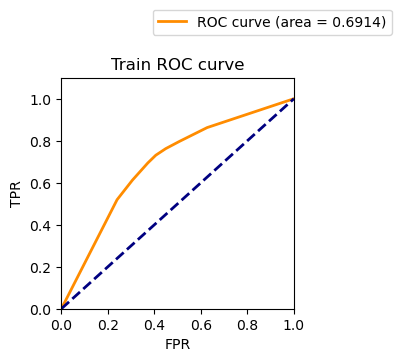

In [49]:
## draw curve ,using FP as xlabel,TP as ylabel
import matplotlib.pyplot as plt
#create new background
plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Train ROC curve')
plt.legend(loc='lower right', bbox_to_anchor=(1.25, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

In [50]:
## calculate FP,TP and AUC under each threshold
from sklearn.metrics import roc_curve, auc
fpr,tpr,threshold = roc_curve(y_test_slct,df_predict_test)
roc_auc = auc(fpr,tpr)

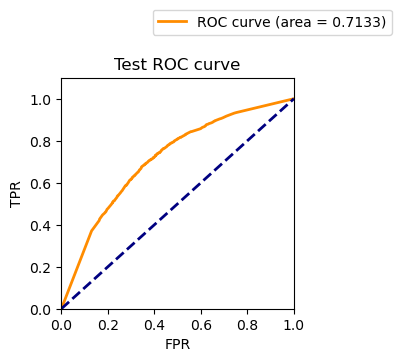

In [51]:
## draw curve ,using FP as xlabel,TP as ylabel
import matplotlib.pyplot as plt
#create new background
plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Test ROC curve')
plt.legend(loc='lower right', bbox_to_anchor=(1.25, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

---
## Step 7: Deeper Consideration of Model Interpretation

The methods of feature selection often reveal information about the correlation between features and labels. Try to analyze the results of feature selection and dimensionality reduction, and attempt to provide causal explanations based on real-world contexts.<br>

we choose 10 most important features below:

1. **kw_avg_avg**: The average of the average search volume of all keywords.
2. **kw_max_avg**: The maximum of the average search volume of all keywords.
3. **self_reference_min_shares**: The minimum number of shares of articles that reference themselves.
4. **LDA_02**: The distribution of the third topic derived using the LDA model.
5. **self_reference_avg_shares**: The average number of shares of articles that reference themselves.
6. **LDA_01**: The distribution of the second topic derived using the LDA model.
7. **kw_avg_min**: The average of the lowest search volume of all keywords.
8. **LDA_04**: The distribution of the fifth topic derived using the LDA model.
9. **LDA_00**: The distribution of the first topic derived using the LDA model.
10. **kw_avg_max**: The average of the highest search volume of all keywords.

**It is evident that 'search volume of keywords', 'self-references of articles in terms of shares', and 'topic distributions from the LDA model' have significant influences on the features.**

The reasons are as follows:

**Search volume of keywords**: The search volume of keywords reflects the level of interest people have in the topics of the articles. Keywords with higher search volumes may represent topics that are more popular or more attractive.

**Self-references of articles in terms of shares**: The number of times articles reference themselves in shares reflects their spread and influence on social networks. If an article is widely referenced and shared, it likely has garnered more attention on social media, thereby increasing its exposure and popularity.

**Topic distributions from the LDA model**: The topic distributions from the LDA model reflect the subjects covered in the articles. The topic distribution from LDA indicates the broad categories of the article's themes, and commonly interested contents usually contain similar topics.
